In [1]:
#...IMPORTING LIBRARY........

In [2]:
import cv2 as CV
import numpy as NP
import matplotlib.pyplot as PL
#from matplotlib import pyplot as PL
#from skimage import feature as F
import skimage.feature as F
import scipy.ndimage as SP
import skimage.filters as SF
import math as M

(-0.5, 255.5, 255.5, -0.5)

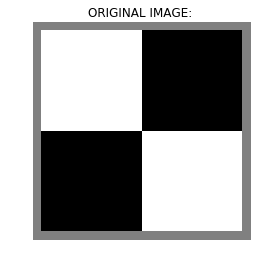

In [3]:
X_1 = CV.imread('image1.png')
X_2= CV.cvtColor(X_1,CV.COLOR_BGR2GRAY)
PL.figure(1)
PL.imshow(X_2,'gray')
PL.title('ORIGINAL IMAGE: ')
PL.axis('off')

In [4]:
#....APPLYING CANNY EDGE DETECTOR FROM LIBRAY SKIMAGE
# ....IT TOOK ARGUMENT AS IMAGE,VALUE OF SIGMA(FOR APPLYINGG GAUSSIAN SMOOTHENEING AND UPPER AND LOWER THRESHOLD VALUE .)

In [5]:
X = F.canny(X_2,1,(0.2*NP.min(X_2)),(0.5*NP.max(X_2)))

In [6]:
#...IT RETURN IMAGE AS TYPE BOOL SO WE NEED TO CONVERT IT INTO SOME ANOTHER DATA TYPE

(-0.5, 255.5, 255.5, -0.5)

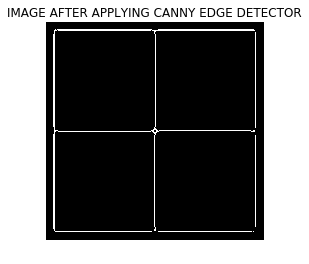

In [7]:
X.dtype = 'uint8'
PL.figure(2)
PL.imshow(X,'gray')
PL.title('IMAGE AFTER APPLYING CANNY EDGE DETECTOR')
PL.axis('off')
#NP.min(X)
#X.dtype

In [8]:
#I = CV.Canny(X_2,(0.1*NP.min(X_2)),(0.2*NP.max(X_2)))
#PL.imshow(I,'gray')

In [9]:
#...APPLYIG SOBEL OPERATOR

Text(0.5,1,'VERTICAL EDGE')

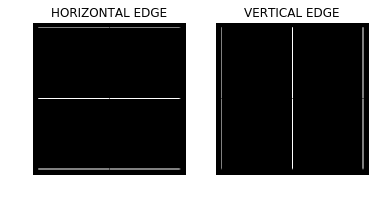

In [10]:
H = SF.sobel_h(X_2)
HORZ = NP.abs(H)
V = SF.sobel_v(X_2)
VERT = NP.abs(V)
PL.figure(3)
PL.subplot(121)
PL.imshow(HORZ,'gray')
PL.axis('off')
PL.title('HORIZONTAL EDGE')
PL.subplot(122)
PL.imshow(VERT,'gray')
PL.axis('off')
PL.title('VERTICAL EDGE')

In [11]:
ANGLE = NP.zeros((X_2.shape[0],X_2.shape[1]))
for i in range(0,X_2.shape[0]):
    for j in range(0,X_2.shape[1]):
        ANGLE[i,j] = NP.degrees(NP.arctan2(VERT[i,j],HORZ[i,j]))
        

In [12]:
if X.shape[0]==X.shape[1]:
    count = int(NP.round(NP.sqrt(2) * X.shape[0]))
else:
    count = int(NP.round(NP.sqrt(X.shape[0]**X.shape[0] + X.shape[1]**X.shape[1])))


In [13]:
H_SPACE = NP.zeros((count,91))


In [14]:
#.......TRANSFORMING INTO HOUGH SPACE

In [15]:
for y in range(0,X.shape[0]):
    for x in range(0,X.shape[1]):
        if X[y,x] == 1:
            for a in range(0,91):
                theta = (M.pi/180 *a)
                S = int(NP.round((x*M.cos(theta) + y*M.sin(theta))))
                H_SPACE[S,a] = H_SPACE[S,a] + 1

Text(0.5,1,'HOUGH SPACE')

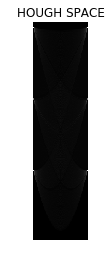

In [16]:
PL.figure(3)
PL.imshow(H_SPACE,'gray')
PL.axis('off')
PL.title('HOUGH SPACE')

In [17]:
I = H_SPACE
L = list(I.ravel())
L.sort(reverse = True)

In [18]:
#print(L)
#x1 = M.cos((M.pi/180)*44)


In [19]:
#......APPLYING HOUGH ALGORITHM FOR DETECTING LINE IN IMAGE.....

In [20]:
for i in range(0,10):
    R = NP.where(H_SPACE == L[i])
    for j in range(0,len(R[0])):
        x1 = int(R[0][j] * M.cos((M.pi/180)*R[1][j]))
        y1 = int(R[0][j] * M.sin((M.pi/180)*R[1][j]))
        if R[1][j] == 0:
            x2 = x1
            y2 = X_2.shape[0]
        elif R[1][j] == 90:
            y2 = y1
            x2 = X_2.shape[1]
        Y=CV.line(X_1,(x1,y1),(x2,y2),(250,2,2),5)
#Y=CV.line(X_1,(x2,y2),(x2,x2),(253,0,0),5)

Text(0.5,1,'OUTPUT IMAGE: ')

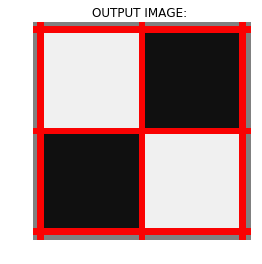

In [21]:
PL.figure(3)
PL.imshow(Y,'gray')
PL.axis('off')
PL.title('OUTPUT IMAGE: ')